<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/TICTACTOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df1 = pd.read_excel("Hamleler.xlsx")

In [4]:
df1

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,top-left-square1,top-middle-square1,top-right-square1,middle-left-square1,middle-middle-square1,middle-right-square1,bottom-left-square1,bottom-middle-square1,bottom-right-square1,Winner
0,1,0,0,1,1,1,0,1,0,2,8,6,9,4,7,5,1,3,456Winner
1,1,0,1,0,1,0,0,0,0,6,7,5,1,8,2,3,4,9,789Winner
2,0,1,0,1,0,0,0,0,1,9,5,6,2,4,7,1,8,3,357Winner
3,0,1,0,0,1,1,1,1,0,6,5,9,3,4,7,8,1,2,258Winner
4,1,1,0,0,1,1,1,1,0,3,7,5,8,6,2,1,9,4,258Winner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,0,1,1,1,1,0,1,0,1,3,4,9,6,8,2,1,7,5,357Winner
79995,0,1,0,1,1,0,1,0,0,1,6,4,8,5,7,3,9,2,369Winner
79996,1,0,1,0,0,1,1,0,0,4,1,9,7,2,3,6,8,5,258Winner
79997,1,1,0,0,1,1,0,1,0,2,4,1,8,7,5,6,3,9,258Winner


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
df_order_items2=df1
# Malzeme ve Tanım özelliklerini sayısal değerlere dönüştür
le = LabelEncoder()
df_order_items2["Winner"] = le.fit_transform(df_order_items2["Winner"])
# Renk Kodu özelliğini tahmin etmek için kullanacağımız sütun
y=df_order_items2["Winner"]

# Tahmin etmek istediğimiz özellik hariç diğer tüm sütunları al
X = df_order_items2.drop("Winner", axis=1)

# Eğitim ve test setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from keras.layers import Dropout
# Yapay sinir ağı modelini oluştur
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) # Dropout katmanı ekle
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2)) # Dropout katmanı ekle
model.add(Dense(len(le.classes_), activation='softmax'))

# Modeli derle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')
# Modeli eğit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10)

Epoch 1/5
7200/7200 [==============================] - 22s 3ms/step - loss: 1.3680 - accuracy: 0.5083 - val_loss: 0.2433 - val_accuracy: 0.9349
Epoch 2/5
7200/7200 [==============================] - 18s 3ms/step - loss: 0.2343 - accuracy: 0.9223 - val_loss: 0.0297 - val_accuracy: 0.9955
Epoch 3/5
7200/7200 [==============================] - 19s 3ms/step - loss: 0.1015 - accuracy: 0.9674 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 4/5
7200/7200 [==============================] - 18s 3ms/step - loss: 0.0629 - accuracy: 0.9799 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/5
7200/7200 [==============================] - 19s 3ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0017 - val_accuracy: 1.0000


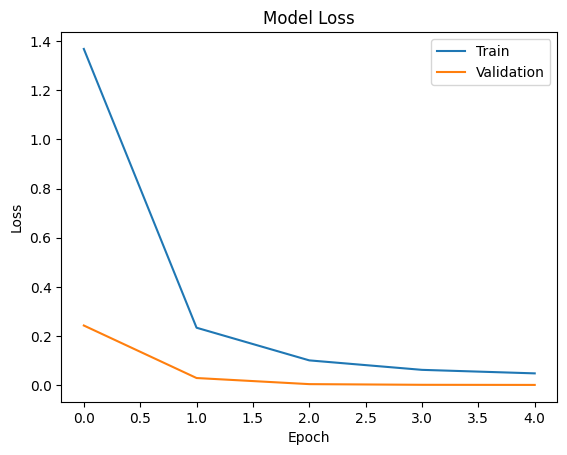

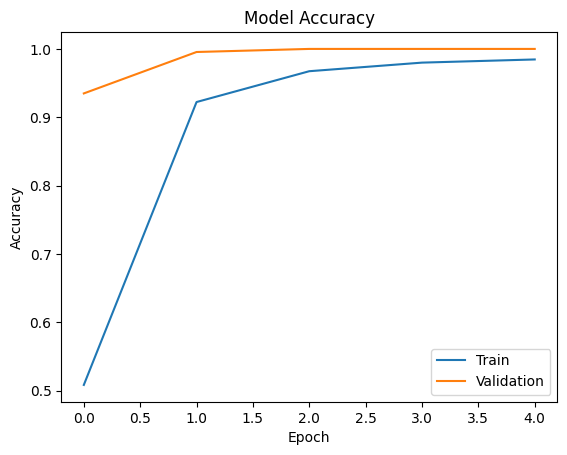

In [7]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıp (loss) değerlerinin grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Eğitim ve doğrulama doğruluk (accuracy) değerlerinin grafiği
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

250/250 [==============================] - 0s 1ms/step


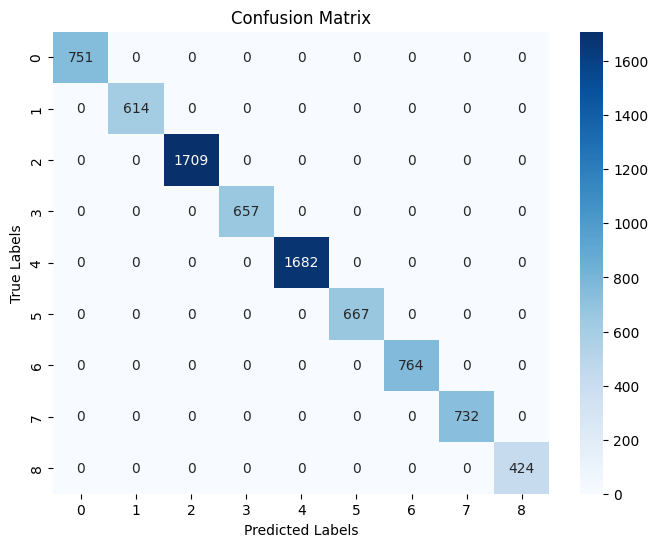

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")

# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()


In [10]:
df2 = pd.read_excel("Kitap 1.xlsx")

In [11]:
df2

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,top-left-square1,top-middle-square1,top-right-square1,middle-left-square1,middle-middle-square1,middle-right-square1,bottom-left-square1,bottom-middle-square1,bottom-right-square1,Winner
0,1,0,0,1,1,1,0,1,0,9,1,6,3,5,4,2,8,7,456Winner


In [18]:
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# df_order_items'tan rastgele bir örnek seç
sample = df2.sample()
print(sample)
# Gerçek renk kodunu al
Gercek_kazanan_kod = sample["Winner"].values[0]

# Tahmini renk kodunu yap
tahmin = model.predict(sample.drop("Winner", axis=1))[0].argmax()
# Tahmin edilen sınıfın etiketini al
tahmin_sinifi = le.inverse_transform([tahmin])[0]
# Tahmin ve gerçek renk kodunu yazdır
print("Gerçek Kazanan Sınıf:", Gercek_kazanan_kod)
print("Tahmin Edilen Kazanan Sınıf:", tahmin_sinifi)

   top-left-square  top-middle-square  top-right-square  middle-left-square  \
0                1                  0                 0                   1   

   middle-middle-square  middle-right-square  bottom-left-square  \
0                     1                    1                   0   

   bottom-middle-square  bottom-right-square  top-left-square1  \
0                     1                    0                 9   

   top-middle-square1  top-right-square1  middle-left-square1  \
0                   1                  6                    3   

   middle-middle-square1  middle-right-square1  bottom-left-square1  \
0                      5                     4                    2   

   bottom-middle-square1  bottom-right-square1     Winner  
0                      8                     7  456Winner  
1/1 [==============================] - 0s 60ms/step
Gerçek Kazanan Sınıf: 456Winner
Tahmin Edilen Kazanan Sınıf: 6
